In [1]:
import numpy as np;
import pyalps.dwa;
import scipy.constants as cst
import seaborn as sns
from jupyterthemes import jtplot
import matplotlib.pyplot as plt 
%matplotlib inline
jtplot.style(theme='grade3',ticks=True, grid=True, figsize=(12, 7),context='poster',fscale=1.5, spines=True, gridlines='--')

In [2]:
def calU(V):      # in recoil energies,should be float
    wlen = np.array([1064., 1064.,1064.]);  # in nanometer
    a    = 100.4;                         # s-wave scattering length in bohr radius
    m    = 86.909;                            # mass in atomic mass unit
    L    = 201;                              # lattice size (along 1 direction),should be integer
    band = pyalps.dwa.bandstructure(V, wlen, a, m, L)
    #print band
    result={}
    result['U']=band.U()
    result['t']=np.array(band.t())
    result['Ut']=result['U']/result['t']
    return result

print('1nK = %f Hz'%(cst.Boltzmann*10**-9/cst.h))

lamda = 1064*10**(-9) #wavelength in nm
k_lamda=2*np.pi/lamda
m_Rb=1.44316*10**(-25) #in kg
Er=(cst.hbar*k_lamda)**2/(2*m_Rb)/cst.h/10**3 #in kHz
print(Er)

1nK = 20.836612 Hz
2.02781479612


CPU times: user 4.52 s, sys: 75.7 ms, total: 4.6 s
Wall time: 4.77 s


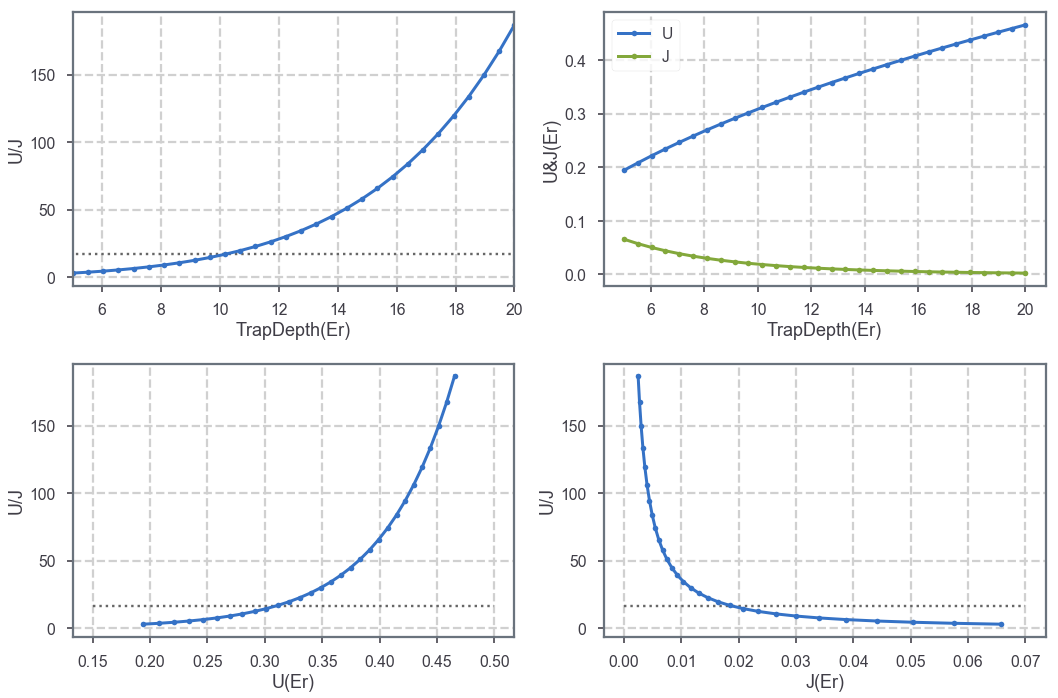

In [10]:
%%time

Uli=[]
tli=[]
Vz=35.0
s=np.linspace(5.0,20.0,30)
for i in s:
    V=np.array([i,i,Vz])
    result=calU(V)
    Uli.append(cst.Boltzmann*10**-9/cst.h*result['U']/Er/1000)
    tli.append(cst.Boltzmann*10**-9/cst.h*result['t'][0]/Er/1000)
Uli=np.array(Uli)
tli=np.array(tli)
Ut=Uli/tli

fig=plt.figure(figsize=(15,10))

ax=fig.add_subplot(221)
ax.grid(True)
ax.set_xlabel('TrapDepth(Er)')
ax.set_ylabel('U/J')
ax.set_xlim(5,20)
ax.hlines(16.74,-2,30,color=[0.4,0.4,0.4],linestyle='dotted')
ax.plot(s,Ut,'.-',linewidth=3)
ax=fig.add_subplot(222)
ax.grid(True)
ax.set_xlabel('TrapDepth(Er)')
ax.set_ylabel('U&J(Er)')
ax.plot(s,Uli,'.-',label='U',linewidth=3)
#ax=fig.add_subplot(223)
ax.plot(s,tli,'.-',label='J',linewidth=3)
ax.legend(loc='best')
ax=fig.add_subplot(223)
ax.set_xlabel('U(Er)')
ax.set_ylabel('U/J')
#ax.set_xlim(15,46)
ax.hlines(16.74,0.15,0.5,color=[0.4,0.4,0.4],linestyle='dotted')
ax.plot(Uli,Ut,'.-',linewidth=3)
ax=fig.add_subplot(224)
ax.set_xlabel('J(Er)')
ax.set_ylabel('U/J')
#ax.set_xlim(0,7.0)
ax.hlines(16.74,0,0.07,color=[0.4,0.4,0.4],linestyle='dotted')
ax.plot(tli,Ut,'.-',linewidth=3)

plt.tight_layout()

Calculate the lattice potential for phase transition point 

In [21]:
def findvforut(Vz,Ut=16.74):
    Vx=20.
    V=np.array([Vx,Vx,Vz])
    error=(calU(V)['Ut'][0]-Ut)/Ut
    while np.abs(error)>0.00001:
#         print(error)
        Vx=Vx-error*3
        V=np.array([Vx,Vx,Vz])
        error=(calU(V)['Ut'][0]-Ut)/Ut
    print('Vx is %0.2f, Error is %0.2e, Ut is %0.10f, U is %0.2f nK, t is %0.2f nK'%(Vx,error,calU(V)['Ut'][0],calU(V)['U'],calU(V)['t'][0]))
    return Vx,calU(V)['Ut'][0],calU(V)['U'],calU(V)['t'][0]

Vz=35.62
Vx_crt=findvforut(Vz,Ut=16.74)

Vx is 10.13, Error is -4.25e-06, Ut is 16.7399288798, U is 30.36 nK, t is 1.81 nK


CPU times: user 5.07 s, sys: 25.9 ms, total: 5.1 s
Wall time: 5.15 s


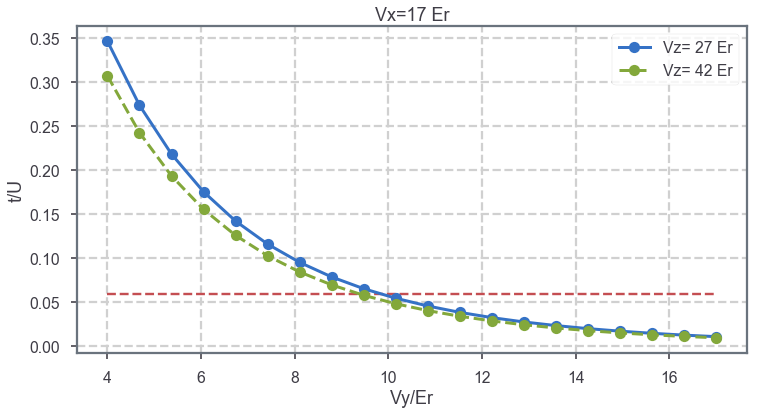

In [15]:
%%time

tU=[]
for i in np.linspace(4.,17.,20):
    s=calU(np.array([17.,i,27.]))
    tU.append(s['t'][1]/s['U'])
    
tU2=[]
for i in np.linspace(4.,17.,20):
    s=calU(np.array([17.,i,42.]))
    tU2.append(s['t'][1]/s['U'])
#print tU
plt.figure(figsize=((12,6)))
plt.grid(True)
plt.xlabel('Vy/Er')
plt.ylabel('t/U')
plt.title('Vx=17 Er')
plt.hlines(1/16.74,4,17,colors='r', linestyles='dashed')
plt.plot(np.linspace(4.,17.,20),tU,'-o',linewidth=3,label='Vz= 27 Er')
plt.plot(np.linspace(4.,17.,20),tU2,'--o',linewidth=3,label='Vz= 42 Er')
plt.legend(loc='best')

Vx is 10.46, Error is -8.48e-06, Ut is 16.7398580763, U is 28.10 nK, t is 1.68 nK
Vx is 10.45, Error is -9.02e-06, Ut is 16.7398489853, U is 28.21 nK, t is 1.69 nK
Vx is 10.43, Error is -9.60e-06, Ut is 16.7398393469, U is 28.32 nK, t is 1.69 nK
Vx is 10.41, Error is -1.41e-06, Ut is 16.7399764462, U is 28.43 nK, t is 1.70 nK
Vx is 10.40, Error is -1.49e-06, Ut is 16.7399750821, U is 28.53 nK, t is 1.70 nK
Vx is 10.38, Error is -1.57e-06, Ut is 16.7399736503, U is 28.63 nK, t is 1.71 nK
Vx is 10.37, Error is -1.66e-06, Ut is 16.7399721482, U is 28.74 nK, t is 1.72 nK
Vx is 10.35, Error is -1.76e-06, Ut is 16.7399705732, U is 28.84 nK, t is 1.72 nK
Vx is 10.34, Error is -1.86e-06, Ut is 16.7399689232, U is 28.94 nK, t is 1.73 nK
Vx is 10.32, Error is -1.96e-06, Ut is 16.7399671972, U is 29.04 nK, t is 1.73 nK
CPU times: user 23.3 s, sys: 236 ms, total: 23.6 s
Wall time: 24.1 s


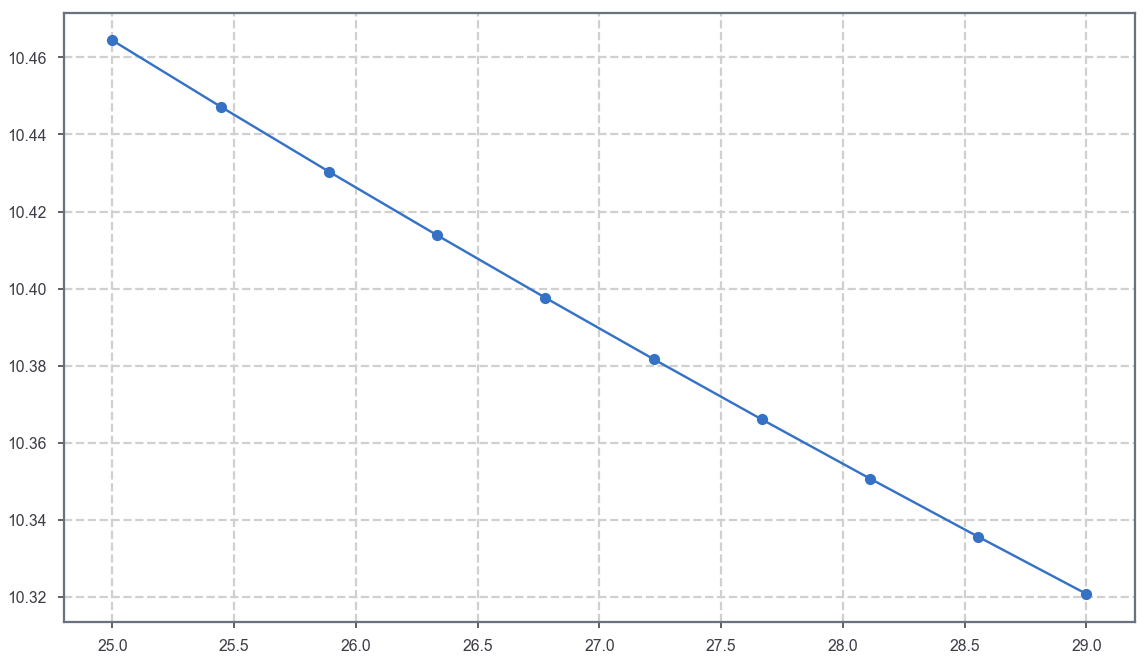

In [17]:
%%time
Vzlist=np.linspace(25,29,10)
criP=[findvforut(Vz,Ut=16.74)[0] for Vz in Vzlist]
plt.plot(Vzlist,criP,'-o')

In [13]:
calU(np.array([27.,27.,35.]))['t']*cst.Boltzmann*10**-9/cst.h

array([ 1.51347676,  1.51347609,  0.44124157])